# Intro to SymPy 

SymPy is a Python library for symbolic mathematics. We can use it to solve differential equations, simplify algebraic operations, evaluate integrals and more. SymPy give us exact symbolic answers instead of numerical approximations. You can check SymPy documentation [here](https://www.sympy.org/en/index.html). 

## Getting started 

The first thing we need to do is to install the SymPy library, 

In [4]:
%pip install sympy 

Note: you may need to restart the kernel to use updated packages.


`SymPy` is not a built-in module so everytime you start a new notebook on Google Colab you need to run the `pip` command above. 

After installing we need to import the libray, 

In [26]:
import sympy as sy 
sy.init_printing()

`import sympy as sy` loads in the SymPy library for us to use. We give a shorthand name `sy` (could be any other name ), so every time we call something from `SymPy`, we use `sy.`. This helps to keep things organized. 

`sy.init_printing()` gets the output to be displayed as nicely formatted mathematics. 

We can check the difference between usign a built-in Python function and the SymPy library by checking this example to compute square roots, 

In [27]:
import math 
math.sqrt(8)

Here we got tan approximate result since it can't be represented by a finite decimal. If all we cared about was the decimal form of the square root of `8`, we would be done. 

But when we use symbolic computation like SymPy, square roots of numbers the are not perfect squares are left unevaluated by default, 

In [15]:
sy.sqrt(8)

## More interesting examples

In SymPy variables are defined using `symbols`, 


In [34]:
from sympy import symbols
x,y = symbols('x y')
expression = x + 2*y 
expression

We can play around and see that if we subtract `x` from the current expression, 

In [35]:
expression - x 
#expression 

automatically canceling `x` with `-x`. 

We can also represent functions in SymPy. For example, let's represent $f(x) = x^3 + x^2 + 10$ 

In [49]:
f = x**3 + x**2 + 10 
f 

It is important to notice that this is not an actuall Python function, described in the previously, rather a symbolic representation of a function. Therefore, to evaluate `f` for different values we use the `subs()` function, 

In [37]:
f.subs(x,4)

## Limits

With SymPy we can evaluate limits symbolically using the `limit()` function,  which has the following syntax, 

```python 
sy.limit(expression,variable,value)

`expression` is the function whose limit we are trying to find. `variable` is the variable with respect we are taking the limit. `value` is the value the variable is approaching. 

To compute one-sided limits, we can add a fourth argument to the function, either a `+` or `-` for a right or left hand limit.

For example, let's evaluate $ \lim_{x \rightarrow 0} \frac{sin(x)}{x}$, 

In [48]:
limit = sy.limit(sy.sin(x)/x , x , 0)
limit

And when $x$ is approaching $\infty$, 

In [41]:
limit = sy.limit(sy.sin(x)/x , x , sy.oo)
limit

## Derivatives 

We can take derivatives with the `diff()` function. Given a function $\sin(x)e^x$, its derivative with respect to $x$ is, 

In [51]:
f = sy.sin(x)*sy.exp(x)
d_x = sy.diff(f,x)
d_x

We can change the variable with respect to ehich we are differentiating, 

In [52]:
d_y = sy.diff(sy.sin(x)*sy.exp(x),y)
d_y 

The `diff()` function can also compute higher order derivatives. Given $f(x) = \sin(x)$

In [56]:
f = sy.sin(x)
df_dx = sy.diff(f,x)
df2_dx2 = f.diff(x,x) # second derivative
df3_dx3 = f.diff(x,x,x) # third derivative

print(df_dx,df2_dx2,df3_dx3)

cos(x) -sin(x) -cos(x)


We can symplify the notation, 

In [60]:
df_dx = sy.diff(f,x)
df2_dx2 = f.diff(x,2) # second derivative
df3_dx3 = f.diff(x,3) # third derivative
print(df_dx,df2_dx2,df3_dx3)

cos(x) -sin(x) -cos(x)


Then, the general format of the `diff()` function is, 


```python 
sy.diff(function,variable, ...)

where `...` represents the possibility of adding high order derivative terms. 

## Integrals 

We use the `integrate` function to integrate using SymPy. For indefinte integrals, the syntax is similar to `diff()`, 

```python 
sy.integrate(expression,variable)

`expression` is a SymPy representation of the function we want to integrate.

`variable` is the variable of integration and must be defined as a SymPy symbol. 

SymPy does not include a constant of integration. 

For definite integrals we have, 

```python 
sy.integrate(expression, (variable, lower_limit, upper_limit)) 

Which contains the `expression` as before and a tuple `(variable, lower_limit, upper_limit)`, a container of more arguments, where `variable` is the same as with indefinite integrals, and `lower_limit` and `upper_limit` the lower and upper bounds of integration. 

As an example, we can compute the indefinite integral of $\int (e^x \sin(x) + e^x \cos(x)) dx$, 

In [61]:
sy.integrate(sy.exp(x)*sy.sin(x) + sy.exp(x)*sy.cos(x),x )

and a definite integral $\int_{-\infty}^{\infty} \sin(x^2) dx$, 

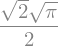

In [62]:
sy.integrate(sy.sin(x**2), (x,-sy.oo,sy.oo))

We can also compute an integral symbolic and then find its numerical value with `evalf()` function, 

In [69]:
def_integral1 = sy.integrate(sy.exp(x), (x, 1, 2))
def_integral1 


In [68]:
numerical_result = def_integral1.evalf()
numerical_result

## Plotting

SymPy also provides a plotting functionality. We simply use the `plot()` function so, 

```python
sy.plot(f,domain,...)

`f` represents the function or functions we are visualizing 

`domain` refers to the interval where the function is plotted over, the default is $[-10,10]$ 

`...` refers to many optional arguments, which can change the plot's appearance and behaviour. 

Let's plot $f(x^2)$ over $[-5,5]$, 

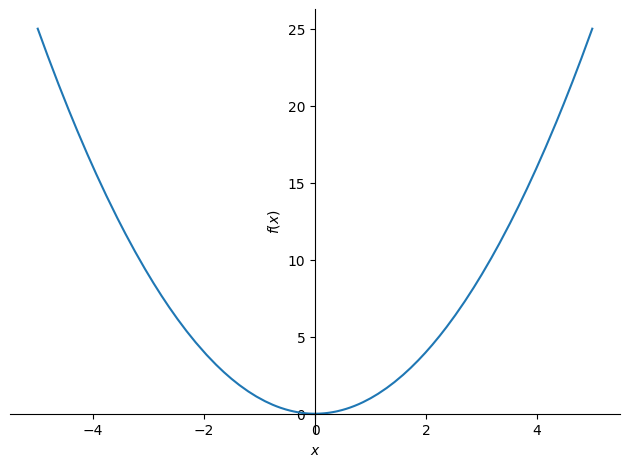

In [70]:
graph = sy.plot(x**2, (x, -5, 5))

We can change the colour of the line and insert a legend for example, 

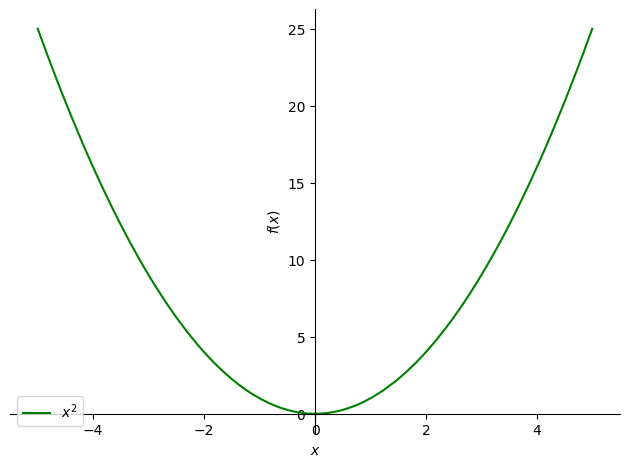

In [71]:
graph = sy.plot(x**2, (x, -5, 5), line_color = 'green', legend ='True')

We can also plot multiple equations together, 

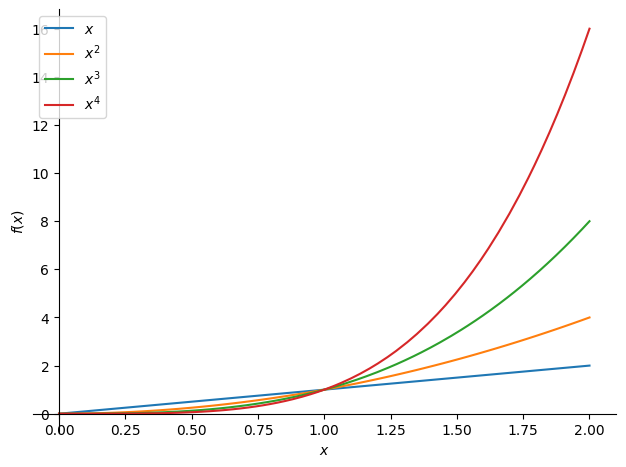

In [72]:
multi_plot = sy.plot(x, x**2, x**3, x**4, (x, 0, 2), legend=True)

This is a small sampling of the sort of symbolic power SymPy is capable of, for more information access [SymPy documentation](https://docs.sympy.org/latest/tutorials/intro-tutorial/intro.html). 